Configuration système optimisée pour Apple M2
Imports et configuration terminés avec succès
Chargement du fichier : ncr_ride_bookings.csv
Taille : 24.4 MB
Dataset chargé avec succès: 150,000 lignes x 21 colonnes

ANALYSE EXPLORATOIRE DES DONNÉES (EDA)

1. INFORMATIONS GÉNÉRALES
   • Dimensions: 150,000 lignes x 21 colonnes
   • Mémoire utilisée: 111.0 MB
   • Plage temporelle: du 2024-01-01 au 2024-12-30

2. APERÇU DES DONNÉES (5 premières lignes)
         Date      Time    Booking ID   Booking Status   Customer ID   Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  Cancelled Rides by Customer Reason for cancelling by Customer  Cancelled Rides by Driver Driver Cancellation Reason  Incomplete Rides Incomplete Rides Reason  Booking Value  Ride Distance  Driver Ratings  Customer Rating Payment Method
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"          eBike          Palam Vihar            Jhilmil       NaN       NaN                        

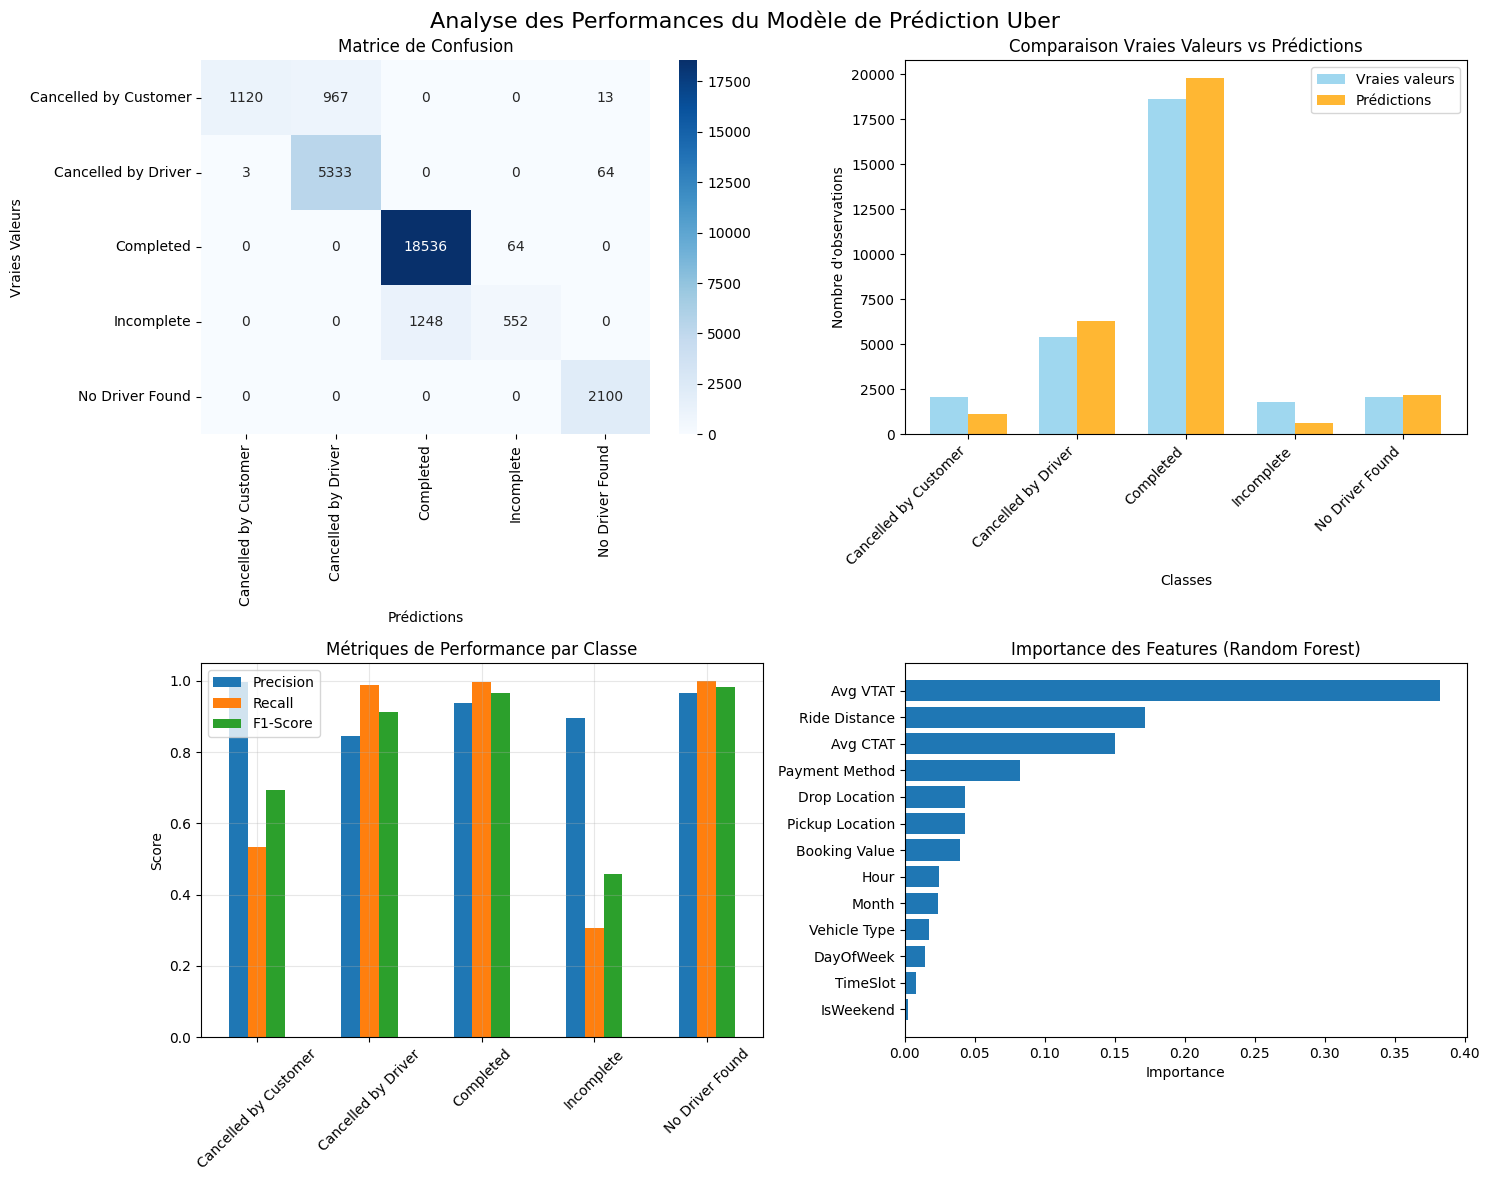

   Visualisations générées avec succès

CONCLUSIONS ET RECOMMANDATIONS

1. RÉSULTATS OBTENUS
   • Modèle final: Random Forest
   • Accuracy: 0.9214 (92.14%)
   • Validation croisée: 0.9210 ± 0.0015
   • Niveau de performance: EXCELLENT (sans data leakage)

2. FORCES DU MODÈLE
   • Classes bien prédites:
     - Cancelled by Driver: F1-Score = 0.912
     - Completed: F1-Score = 0.966
     - No Driver Found: F1-Score = 0.982

3. POINTS D'AMÉLIORATION
   • Classes à améliorer:
     - Incomplete: F1-Score = 0.457, Recall = 0.307

4. RECOMMANDATIONS TECHNIQUES
   • Feature engineering avancé:
     - Enrichir les données de géolocalisation
     - Créer des features d'historique client
     - Intégrer des données externes (météo, trafic)
   • Modélisation adaptée:
     - Tester XGBoost, CatBoost
     - Optimiser les seuils de décision par classe

5. RECOMMANDATIONS BUSINESS
   • Monitoring: Surveiller la dérive des données en production
   • Seuils de décision: Ajuster selon les coûts métier
 

In [ ]:
# ============================================================================
# PROJET DATA SCIENCE COMPLET : PRÉDICTION DES STATUTS DE RÉSERVATION UBER
# ============================================================================
# Rôle : Titre principal du projet pour identifier clairement l'objectif
# Intérêt : Documentation, traçabilité du projet, communication de l'objectif métier

# Import du module os pour interagir avec le système d'exploitation
# Rôle : Accès aux variables d'environnement pour optimiser les performances
# Intérêt : Configuration des threads pour processeur Apple M2 8 cœurs
import os

# Import du module warnings pour contrôler les avertissements Python
# Rôle : Suppression des messages d'alerte non critiques lors de l'exécution
# Intérêt : Interface utilisateur plus propre, focus sur les résultats importants
import warnings

# Import de pathlib pour manipulation moderne des chemins de fichiers
# Rôle : Gestion cross-platform des paths avec syntaxe object-oriented
# Intérêt : Robustesse, méthodes utilitaires intégrées, éviter les erreurs de path
from pathlib import Path

# Configuration du nombre de threads pour OpenBLAS (algèbre linéaire)
# Rôle : Optimisation du parallélisme pour les opérations matricielles
# Intérêt : Utilisation maximale des 8 cœurs du processeur M2, performance accrue
os.environ['OPENBLAS_NUM_THREADS'] = '8'

# Configuration du nombre de threads pour Intel MKL (Math Kernel Library)
# Rôle : Optimisation des calculs mathématiques vectorisés
# Intérêt : Accélération des opérations NumPy/SciPy sur architecture ARM64
os.environ['MKL_NUM_THREADS'] = '8'

# Configuration du nombre de threads pour OpenMP (parallélisation automatique)
# Rôle : Contrôle du parallélisme des boucles automatiquement parallélisées
# Intérêt : Éviter la sur-souscription, optimiser l'utilisation CPU
os.environ['OMP_NUM_THREADS'] = '8'

# Désactivation globale des avertissements Python
# Rôle : Suppression des warnings non critiques de toutes les librairies
# Intérêt : Sortie console claire, concentration sur les résultats métier
warnings.filterwarnings('ignore')

# Import de pandas pour la manipulation des données tabulaires
# Rôle : Chargement, transformation et analyse des datasets CSV
# Intérêt : Interface intuitive pour les opérations sur DataFrames
import pandas as pd

# Import de numpy pour les calculs numériques et algèbre linéaire
# Rôle : Opérations mathématiques optimisées sur arrays multidimensionnels
# Intérêt : Performance C native, base des calculs machine learning
import numpy as np

# Import de matplotlib.pyplot pour la création de graphiques
# Rôle : Génération de visualisations statiques (barres, courbes, heatmaps)
# Intérêt : Communication visuelle des insights, rapport professionnel
import matplotlib.pyplot as plt

# Import de seaborn pour des visualisations statistiques avancées
# Rôle : Graphiques statistiques avec esthétique améliorée
# Intérêt : Heatmaps, distributions, corrélations avec moins de code
import seaborn as sns

# Configuration du style graphique par défaut de matplotlib
# Rôle : Définition de l'apparence visuelle standard des graphiques
# Intérêt : Cohérence esthétique, lisibilité optimisée
plt.style.use('default')

# Configuration de la résolution des graphiques pour écrans haute densité
# Rôle : Définition de la qualité d'affichage des figures générées
# Intérêt : Rendu optimal sur écran Retina, qualité professionnelle
plt.rcParams['figure.dpi'] = 100

# Configuration de la taille de police globale des graphiques
# Rôle : Standardisation de la lisibilité du texte dans les visualisations
# Intérêt : Adaptation aux écrans haute résolution, uniformité visuelle
plt.rcParams['font.size'] = 10

# Import de train_test_split pour diviser les données entraînement/test
# Rôle : Séparation reproductible des données pour validation non biaisée
# Intérêt : Évaluation honnête des performances, détection de l'overfitting
from sklearn.model_selection import train_test_split

# Import de cross_val_score pour la validation croisée
# Rôle : Estimation robuste des performances via validation k-fold
# Intérêt : Réduction de la variance des métriques, fiabilité statistique
from sklearn.model_selection import cross_val_score

# Import de LabelEncoder pour encoder les variables catégorielles
# Rôle : Conversion des catégories texte en entiers pour les algorithmes ML
# Intérêt : Compatibilité avec les modèles numériques, efficacité mémoire
from sklearn.preprocessing import LabelEncoder

# Import de StandardScaler pour normaliser les features numériques
# Rôle : Centrage (moyenne=0) et réduction (écart-type=1) des variables
# Intérêt : Égalisation de l'influence des variables à différentes échelles
from sklearn.preprocessing import StandardScaler

# Import de SimpleImputer pour traiter les valeurs manquantes
# Rôle : Remplacement automatique des NaN par des stratégies prédéfinies
# Intérêt : Conservation du maximum de données, éviter les erreurs
from sklearn.impute import SimpleImputer

# Import de RandomForestClassifier pour l'algorithme d'ensemble
# Rôle : Modèle basé sur de multiples arbres avec vote majoritaire
# Intérêt : Robustesse aux outliers, capture des interactions non-linéaires
from sklearn.ensemble import RandomForestClassifier

# Import de LogisticRegression pour l'algorithme de classification linéaire
# Rôle : Modèle probabiliste linéaire pour classification multiclasse
# Intérêt : Rapidité, interprétabilité, bon modèle de référence (baseline)
from sklearn.linear_model import LogisticRegression

# Import de accuracy_score pour calculer le taux de bonnes prédictions
# Rôle : Métrique principale = (prédictions correctes / total) × 100
# Intérêt : Compréhension intuitive, comparaison simple entre modèles
from sklearn.metrics import accuracy_score

# Import de classification_report pour un rapport détaillé des performances
# Rôle : Calcul automatique precision, recall, f1-score par classe
# Intérêt : Vision complète des performances, détection des classes problématiques
from sklearn.metrics import classification_report

# Import de confusion_matrix pour analyser les erreurs de classification
# Rôle : Matrice croisant vraies valeurs et prédictions
# Intérêt : Identification des confusions spécifiques entre classes
from sklearn.metrics import confusion_matrix

# Import de precision_recall_fscore_support pour métriques par classe
# Rôle : Calcul détaillé des métriques individuelles par classe
# Intérêt : Analyse granulaire, optimisation ciblée par classe
from sklearn.metrics import precision_recall_fscore_support

# Import de Pipeline pour chaîner preprocessing et modèle
# Rôle : Encapsulation de la séquence transformations → modèle
# Intérêt : Évite le data leakage, reproductibilité, code plus propre
from sklearn.pipeline import Pipeline

# Configuration pandas pour afficher toutes les colonnes sans troncature
# Rôle : Désactivation de la limitation d'affichage des colonnes nombreuses
# Intérêt : Visibilité complète des données, debug facilité
pd.set_option('display.max_columns', None)

# Configuration de la largeur d'affichage maximale des DataFrames
# Rôle : Extension de l'espace horizontal pour l'affichage
# Intérêt : Éviter les retours à la ligne sur écrans larges, lisibilité
pd.set_option('display.width', 1000)

# Configuration du nombre maximum de lignes affichées
# Rôle : Limitation pour éviter l'encombrement avec de gros datasets
# Intérêt : Performance d'affichage, vue représentative sans surcharge
pd.set_option('display.max_rows', 100)

# Message de confirmation du chargement des configurations système
# Rôle : Feedback utilisateur sur l'état de l'initialisation
# Intérêt : Validation que l'optimisation M2 est active
print("Configuration système optimisée pour Apple M2")

# Message de confirmation du succès des imports
# Rôle : Validation que toutes les dépendances sont disponibles
# Intérêt : Détection précoce des problèmes d'environnement
print("Imports et configuration terminés avec succès")

# Définition d'une fonction de chargement sécurisé des données
# Rôle : Centralisation de la logique de chargement avec gestion d'erreurs
# Intérêt : Réutilisabilité, robustesse, feedback détaillé
def load_and_validate_data(file_path):
    # Ouverture d'un bloc try pour capturer les exceptions
    # Rôle : Gestion gracieuse des erreurs sans crash du programme
    # Intérêt : Robustesse, messages d'erreur informatifs
    try:
        # Conversion du chemin string en objet Path
        # Rôle : Utilisation de l'API moderne pathlib pour la manipulation
        # Intérêt : Compatibilité cross-platform, méthodes utilitaires
        file_path = Path(file_path)
        
        # Test d'existence du fichier avant tentative de lecture
        # Rôle : Validation préalable pour éviter FileNotFoundError
        # Intérêt : Message d'erreur explicite, éviter tentatives inutiles
        if not file_path.exists():
            # Affichage d'un message d'erreur avec chemin spécifique
            # Rôle : Information précise sur le problème rencontré
            # Intérêt : Debug facilité, indication du chemin attendu
            print(f"ERREUR: Fichier non trouvé à l'emplacement {file_path}")
            
            # Retour de None pour signaler l'échec
            # Rôle : Convention Python pour indiquer l'absence de résultat valide
            # Intérêt : Gestion uniforme des échecs par le code appelant
            return None
        
        # Calcul de la taille du fichier en mégaoctets
        # Rôle : Information sur la volumétrie pour estimer le temps de chargement
        # Intérêt : Validation de la taille attendue, planification ressources
        file_size_mb = file_path.stat().st_size / 1024**2
        
        # Affichage du nom du fichier en cours de traitement
        # Rôle : Feedback utilisateur sur l'opération en cours
        # Intérêt : Traçabilité, confirmation du fichier traité
        print(f"Chargement du fichier : {file_path.name}")
        
        # Affichage de la taille pour validation
        # Rôle : Information sur la volumétrie des données à traiter
        # Intérêt : Détection d'anomalies de taille, estimation durée
        print(f"Taille : {file_size_mb:.1f} MB")
        
        # Chargement effectif du fichier CSV avec pandas
        # Rôle : Lecture et parsing du CSV en DataFrame exploitable
        # Intérêt : Structure tabulaire, optimisations automatiques pandas
        df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
        
        # Test que le DataFrame chargé n'est pas vide
        # Rôle : Validation de base du contenu après chargement
        # Intérêt : Détection des fichiers corrompus ou vides
        if df.empty:
            # Message spécifique pour dataset vide
            # Rôle : Distinction des types d'erreurs pour debug
            # Intérêt : Information précise sur la nature du problème
            print("ERREUR: Le dataset est vide")
            
            # Retour None pour échec
            # Rôle : Signal d'erreur standardisé
            # Intérêt : Gestion uniforme par le code appelant
            return None
            
        # Message de succès avec dimensions du dataset
        # Rôle : Confirmation et information sur les données chargées
        # Intérêt : Validation visuelle, info sur la volumétrie
        print(f"Dataset chargé avec succès: {df.shape[0]:,} lignes x {df.shape[1]} colonnes")
        
        # Retour du DataFrame validé
        # Rôle : Transmission du résultat au code appelant
        # Intérêt : Données prêtes à l'exploitation
        return df
        
    # Capture de toute exception non prévue
    # Rôle : Filet de sécurité pour erreurs imprévues
    # Intérêt : Robustesse maximale, pas de crash
    except Exception as e:
        # Affichage du détail de l'exception
        # Rôle : Information pour debug en cas de problème imprévu
        # Intérêt : Traçabilité des erreurs, aide au debug
        print(f"ERREUR lors du chargement: {e}")
        
        # Retour None pour échec
        # Rôle : Signal d'erreur uniforme
        # Intérêt : Cohérence de gestion des erreurs
        return None

# Définition d'une constante pour le chemin vers les données
# Rôle : Centralisation de la configuration du fichier source
# Intérêt : Modification facile, éviter la duplication, lisibilité
DATA_PATH = "/Users/nadiraliahmed/Desktop/ProjetData /uber/archive/ncr_ride_bookings.csv"

# Appel de la fonction de chargement avec le chemin configuré
# Rôle : Exécution du chargement des données principales
# Intérêt : Récupération du DataFrame ou détection d'erreur
df_raw = load_and_validate_data(DATA_PATH)

# Test de validité du résultat de chargement
# Rôle : Vérification que les données ont été correctement chargées
# Intérêt : Arrêt précoce si problème critique, éviter erreurs cascade
if df_raw is None:
    # Message d'arrêt explicite en cas d'échec
    # Rôle : Information claire sur l'impossibilité de continuer
    # Intérêt : Éviter exécution de code dépendant de données inexistantes
    print("ARRÊT: Impossible de continuer sans données")
    
    # Terminaison propre du programme
    # Rôle : Arrêt contrôlé en cas d'échec critique
    # Intérêt : Éviter les erreurs en cascade, terminaison propre
    exit()

# Affichage d'un séparateur visuel pour structurer la sortie
# Rôle : Délimitation claire entre les sections du rapport
# Intérêt : Navigation facile dans les outputs, structure professionnelle
print("\n" + "="*70)

# Affichage du titre de la section d'analyse exploratoire
# Rôle : Identification claire de la phase en cours
# Intérêt : Organisation du workflow, repères visuels
print("ANALYSE EXPLORATOIRE DES DONNÉES (EDA)")

# Fermeture du séparateur pour encadrer le titre
# Rôle : Cohérence esthétique avec l'ouverture
# Intérêt : Présentation professionnelle, délimitation visuelle
print("="*70)

# Affichage du sous-titre pour les informations générales
# Rôle : Structure hiérarchique de l'analyse exploratoire
# Intérêt : Organisation logique, navigation dans le rapport
print(f"\n1. INFORMATIONS GÉNÉRALES")

# Affichage des dimensions du dataset avec formatage des nombres
# Rôle : Information de base sur la taille des données
# Intérêt : Évaluation volumétrie, planification ressources
print(f"   • Dimensions: {df_raw.shape[0]:,} lignes x {df_raw.shape[1]} colonnes")

# Calcul de l'usage mémoire total avec conversion en MB
# Rôle : Évaluation de l'empreinte mémoire des données
# Intérêt : Vérification compatibilité avec ressources disponibles
memory_usage_mb = df_raw.memory_usage(deep=True).sum() / 1024**2

# Affichage de l'usage mémoire calculé
# Rôle : Information sur les ressources consommées
# Intérêt : Planification mémoire, détection de problèmes potentiels
print(f"   • Mémoire utilisée: {memory_usage_mb:.1f} MB")

# Affichage de la plage temporelle couverte par les données
# Rôle : Information sur l'étendue temporelle du dataset
# Intérêt : Validation période d'analyse, détection anomalies temporelles
print(f"   • Plage temporelle: du {df_raw['Date'].min()} au {df_raw['Date'].max()}")

# Sous-titre pour l'aperçu des premières lignes
# Rôle : Introduction à l'affichage des données concrètes
# Intérêt : Structure claire, anticipation du contenu
print(f"\n2. APERÇU DES DONNÉES (5 premières lignes)")

# Affichage des 5 premières lignes du DataFrame
# Rôle : Vue concrète de la structure et du contenu des données
# Intérêt : Validation visuelle, compréhension du format
print(df_raw.head())

# Sous-titre pour l'analyse détaillée des variables
# Rôle : Introduction à l'examen systématique de chaque colonne
# Intérêt : Préparation à l'analyse granulaire
print(f"\n3. ANALYSE DÉTAILLÉE DES VARIABLES")

# Ligne de séparation pour le tableau récapitulatif
# Rôle : Délimitation visuelle du début du tableau
# Intérêt : Structure tabulaire claire, lisibilité
print("-" * 70)

# En-tête du tableau d'analyse avec colonnes alignées
# Rôle : Définition des colonnes d'information sur les variables
# Intérêt : Compréhension immédiate du contenu tabulaire
print(f"{'Variable':<25} {'Type':<12} {'Uniques':<8} {'Manquant':<8} {'% Manquant':<12}")

# Seconde ligne de séparation sous l'en-tête
# Rôle : Délimitation entre en-tête et contenu
# Intérêt : Convention tabulaire, amélioration lisibilité
print("-" * 70)

# Boucle d'analyse systématique de chaque colonne du dataset
# Rôle : Traitement exhaustif de toutes les variables
# Intérêt : Vue complète, détection des problèmes de qualité
for col in df_raw.columns:
    # Calcul du nombre de valeurs uniques dans la colonne
    # Rôle : Mesure de la diversité/cardinalité de la variable
    # Intérêt : Détection variables catégorielles, évaluation complexité
    unique_count = df_raw[col].nunique()
    
    # Comptage des valeurs manquantes (NaN)
    # Rôle : Quantification des données manquantes
    # Intérêt : Évaluation qualité, planification stratégie imputation
    missing_count = df_raw[col].isnull().sum()
    
    # Calcul du pourcentage de valeurs manquantes
    # Rôle : Normalisation pour comparaison entre variables
    # Intérêt : Évaluation relative de la complétude
    missing_percent = (missing_count / len(df_raw)) * 100
    
    # Récupération du type de données pandas
    # Rôle : Identification du type de la variable
    # Intérêt : Planification des transformations nécessaires
    data_type = str(df_raw[col].dtype)
    
    # Affichage formaté de toutes les statistiques calculées
    # Rôle : Présentation structurée des informations de la variable
    # Intérêt : Vue d'ensemble, comparaison facile entre variables
    print(f"{col:<25} {data_type:<12} {unique_count:<8} {missing_count:<8} {missing_percent:<12.1f}%")

# Définition de la variable cible basée sur la connaissance métier
# Rôle : Sélection de la variable à prédire selon l'objectif business
# Intérêt : Orientation claire du problème de machine learning
TARGET_COLUMN = "Booking Status"

# Affichage de la variable cible sélectionnée
# Rôle : Confirmation explicite du choix de target
# Intérêt : Traçabilité de la décision, validation
print(f"\n5. VARIABLE CIBLE SÉLECTIONNÉE: '{TARGET_COLUMN}'")

# Test de présence de la variable cible dans le dataset
# Rôle : Validation de cohérence entre sélection et données
# Intérêt : Éviter erreurs d'exécution, vérification préalable
if TARGET_COLUMN in df_raw.columns:
    # Calcul de la distribution des classes de la cible
    # Rôle : Analyse de la répartition des valeurs à prédire
    # Intérêt : Détection déséquilibres, planification stratégie
    target_distribution = df_raw[TARGET_COLUMN].value_counts()
    
    # Sous-titre pour la distribution des classes
    # Rôle : Structure de l'affichage des statistiques de cible
    # Intérêt : Clarté dans la présentation
    print(f"\nDistribution des classes:")
    
    # Boucle d'affichage de chaque classe avec effectifs et pourcentages
    # Rôle : Présentation détaillée de la répartition
    # Intérêt : Évaluation quantitative de l'équilibre
    for class_name, count in target_distribution.items():
        # Calcul du pourcentage pour chaque classe
        # Rôle : Normalisation pour faciliter l'interprétation
        # Intérêt : Comparaison relative indépendante de la taille
        percentage = (count / len(df_raw)) * 100
        
        # Affichage formaté nom, effectif et pourcentage
        # Rôle : Information complète sur chaque classe
        # Intérêt : Évaluation de l'importance relative
        print(f"   • {class_name}: {count:,} ({percentage:.1f}%)")
    
    # Calcul du pourcentage de la classe majoritaire
    # Rôle : Identification du niveau de déséquilibre
    # Intérêt : Décision sur techniques de rééquilibrage
    max_class_pct = (target_distribution.iloc[0] / len(df_raw)) * 100
    
    # Test de détection d'un déséquilibre significatif
    # Rôle : Application d'une règle métier (seuil 60%)
    # Intérêt : Anticipation des problèmes de modélisation
    if max_class_pct > 60:
        # Avertissement de déséquilibre avec pourcentage
        # Rôle : Alerte sur problème potentiel de modélisation
        # Intérêt : Préparation aux techniques de compensation
        print(f"   ⚠ DÉSÉQUILIBRE DÉTECTÉ: Classe majoritaire = {max_class_pct:.1f}%")
        
        # Suggestion de solution technique
        # Rôle : Recommandation basée sur bonnes pratiques ML
        # Intérêt : Guidance automatique vers techniques appropriées
        print(f"     → Utilisation recommandée de 'class_weight=balanced'")

# Séparateur pour la section de nettoyage et preprocessing
# Rôle : Transition visuelle entre EDA et preprocessing
# Intérêt : Structure claire du workflow
print("\n" + "="*70)

# Titre de la section de nettoyage des données
# Rôle : Identification de la phase de preprocessing
# Intérêt : Suivi de progression, organisation logique
print("NETTOYAGE ET PRÉPROCESSING")

# Fermeture du séparateur de titre
# Rôle : Cohérence esthétique avec l'ouverture
# Intérêt : Professionnalisme visuel
print("="*70)

# Création d'une copie du DataFrame original
# Rôle : Préservation des données brutes pour référence
# Intérêt : Possibilité de rollback, comparaisons, audit
df_clean = df_raw.copy()

# Sauvegarde des dimensions initiales pour suivi
# Rôle : Mémorisation de l'état avant transformation
# Intérêt : Quantification de l'impact des opérations
initial_shape = df_clean.shape

# Sous-titre de la section de nettoyage
# Rôle : Structure des opérations de nettoyage
# Intérêt : Suivi étape par étape des transformations
print(f"\n1. NETTOYAGE DES DONNÉES")

# Affichage de l'état initial pour référence
# Rôle : Point de départ avant transformations
# Intérêt : Base de comparaison pour mesurer l'impact
print(f"   • Dataset initial: {initial_shape[0]:,} lignes")

# Suppression des lignes où la variable cible est manquante
# Rôle : Élimination des observations sans étiquette
# Intérêt : Impossible d'entraîner un modèle supervisé sans target
df_clean = df_clean.dropna(subset=[TARGET_COLUMN])

# Affichage du nouvel état après suppression
# Rôle : Information post-transformation
# Intérêt : Évaluation de l'impact sur la taille
print(f"   • Après suppression cible manquante: {df_clean.shape[0]:,} lignes")

# Calcul du nombre de lignes supprimées
# Rôle : Quantification de la perte de données
# Intérêt : Évaluation de l'impact sur la représentativité
lines_dropped = initial_shape[0] - df_clean.shape[0]

# Affichage du nombre de lignes perdues
# Rôle : Information sur l'ampleur de la perte
# Intérêt : Validation de l'acceptabilité de la perte
print(f"   • Lignes supprimées: {lines_dropped:,}")

# Définition du seuil de tolérance pour les colonnes incomplètes
# Rôle : Paramètrage de la règle d'élimination des variables
# Intérêt : Critère objectif, ajustable selon le contexte
high_missing_threshold = 0.8

# Initialisation de la liste des colonnes à supprimer
# Rôle : Collection des variables candidates à l'élimination
# Intérêt : Traçabilité des décisions, validation ultérieure
columns_to_drop = []

# Sous-titre pour l'identification des colonnes problématiques
# Rôle : Information sur les critères appliqués
# Intérêt : Transparence du processus de sélection
print(f"\n2. IDENTIFICATION DES COLONNES INUTILISABLES (>{high_missing_threshold*100}% manquant)")

# Boucle d'évaluation de chaque colonne selon le critère de qualité
# Rôle : Application systématique du seuil de tolérance
# Intérêt : Décision objective basée sur la qualité
for col in df_clean.columns:
    # Exclusion de la variable cible du processus de suppression
    # Rôle : Protection de la variable essentielle à la prédiction
    # Intérêt : Éviter suppression accidentelle de la target
    if col != TARGET_COLUMN:
        # Calcul du taux de valeurs manquantes
        # Rôle : Évaluation de la complétude de la variable
        # Intérêt : Application du critère de seuil
        missing_pct = df_clean[col].isnull().sum() / len(df_clean)
        
        # Test de dépassement du seuil de tolérance
        # Rôle : Application de la règle de suppression
        # Intérêt : Élimination automatique des variables de mauvaise qualité
        if missing_pct > high_missing_threshold:
            # Ajout à la liste de suppression
            # Rôle : Enregistrement de la décision
            # Intérêt : Traçabilité pour validation
            columns_to_drop.append(col)
            
            # Affichage de la décision avec justification
            # Rôle : Information transparente sur les suppressions
            # Intérêt : Audit des transformations, révision possible
            print(f"   • {col}: {missing_pct*100:.1f}% manquant → SUPPRESSION")

# Suppression effective des colonnes identifiées
# Rôle : Application des décisions de suppression
# Intérêt : Réduction de dimensionalité, amélioration qualité
df_clean = df_clean.drop(columns=columns_to_drop)

# Calcul du nombre de colonnes restantes
# Rôle : Quantification du résultat de l'opération
# Intérêt : Évaluation de la réduction de dimensionalité
remaining_cols = df_clean.shape[1]

# Calcul du nombre de colonnes supprimées
# Rôle : Quantification de l'impact de la suppression
# Intérêt : Validation de l'ampleur de la réduction
dropped_cols = len(columns_to_drop)

# Affichage du bilan de l'opération
# Rôle : Information sur l'impact de la suppression
# Intérêt : Évaluation de la structure résultante
print(f"   • Colonnes restantes: {remaining_cols} (supprimées: {dropped_cols})")

# Sous-titre pour la section de feature engineering
# Rôle : Introduction à la préparation des variables
# Intérêt : Structure logique, anticipation des transformations
print(f"\n3. FEATURE ENGINEERING")

# Séparation de la variable cible des variables explicatives
# Rôle : Isolation de la target selon convention ML
# Intérêt : Préparation format d'entrée algorithmes supervisés
X = df_clean.drop(columns=[TARGET_COLUMN])

# Copie de la variable cible dans une série dédiée
# Rôle : Extraction de la target dans structure séparée
# Intérêt : Manipulation indépendante, éviter modifications accidentelles
y = df_clean[TARGET_COLUMN].copy()

# Affichage du nombre de features disponibles
# Rôle : Information sur l'espace des variables explicatives
# Intérêt : Évaluation de la dimensionalité du problème
print(f"   • Features disponibles: {X.shape[1]}")

# Affichage du nombre d'observations
# Rôle : Confirmation de la taille de l'échantillon
# Intérêt : Évaluation de la représentativité statistique
print(f"   • Observations: {X.shape[0]:,}")

# Définition de la liste des features légitimes selon expertise métier
# Rôle : Sélection basée sur la connaissance business du domaine
# Intérêt : Éviter data leakage, variables disponibles à la réservation
LEGITIMATE_FEATURES = [
    'Date',               # Date de réservation
    'Time',               # Heure de réservation  
    'Pickup Location',    # Lieu de départ choisi
    'Drop Location',      # Lieu d'arrivée choisi
    'Ride Distance',      # Distance estimée du trajet
    'Booking Value',      # Valeur estimée de la course
    'Vehicle Type',       # Type de véhicule choisi
    'Payment Method',     # Mode de paiement sélectionné
    'Avg VTAT',          # Temps d'attente véhicule historique
    'Avg CTAT'           # Temps d'attente client historique
]

# Affichage de confirmation de la sélection de features
# Rôle : Information sur les variables retenues
# Intérêt : Traçabilité de la sélection métier
print(f"\n   ✅ FEATURES LÉGITIMES SÉLECTIONNÉES")

# Affichage du nombre de features dans la liste
# Rôle : Information sur la taille de la sélection
# Intérêt : Évaluation de la richesse des variables disponibles
print(f"   Variables définies par l'utilisateur: {len(LEGITIMATE_FEATURES)}")

# Initialisation de la liste des features effectivement disponibles
# Rôle : Collection des variables présentes dans le dataset
# Intérêt : Adaptation entre sélection théorique et réalité
available_features = []

# Boucle de vérification de disponibilité de chaque feature
# Rôle : Test de présence de chaque variable sélectionnée
# Intérêt : Éviter erreurs, utiliser seulement variables existantes
for feat in LEGITIMATE_FEATURES:
    # Test de présence dans le dataset
    # Rôle : Vérification existence de la variable
    # Intérêt : Éviter KeyError lors de l'extraction
    if feat in X.columns:
        # Ajout à la liste des disponibles
        # Rôle : Collection des variables utilisables
        # Intérêt : Construction de la liste finale
        available_features.append(feat)
        
        # Affichage de confirmation de disponibilité
        # Rôle : Information positive sur la variable
        # Intérêt : Validation visuelle, traçabilité
        print(f"     + {feat}: DISPONIBLE")
    else:
        # Affichage d'information sur indisponibilité
        # Rôle : Information sur l'écart entre théorie et réalité
        # Intérêt : Debug, adaptation de la sélection
        print(f"     - {feat}: NON DISPONIBLE dans le dataset")

# Message de validation de l'expertise utilisateur
# Rôle : Confirmation de la confiance dans la sélection
# Intérêt : Validation de l'approche métier
print(f"   ✅ Features validées par l'expertise utilisateur")

# Extraction du sous-ensemble de données avec features sélectionnées
# Rôle : Création du dataset final pour modélisation
# Intérêt : Focus sur variables pertinentes, réduction bruit
X_selected = X[available_features].copy()

# Affichage des dimensions du dataset final
# Rôle : Information sur la taille du dataset de travail
# Intérêt : Validation cohérence sélection/résultat
print(f"   • Shape finale: {X_selected.shape}")

# Test de présence des variables temporelles pour feature engineering
# Rôle : Condition préalable aux transformations temporelles
# Intérêt : Éviter erreurs, maximiser valeur des données temporelles
if 'Date' in X_selected.columns and 'Time' in X_selected.columns:
    # Information sur le début du feature engineering temporel
    # Rôle : Communication de l'opération en cours
    # Intérêt : Suivi des transformations, feedback utilisateur
    print(f"\n   🕒 FEATURE ENGINEERING TEMPOREL")
    
    # Bloc try pour gestion des erreurs de parsing temporel
    # Rôle : Robustesse face aux formats de date/heure inattendus
    # Intérêt : Continuité du processus même avec données problématiques
    try:
        # Création d'une colonne datetime complète par concaténation
        # Rôle : Combinaison Date + Time pour extraction features temporelles
        # Intérêt : Exploitation maximale de l'information temporelle
        X_selected['DateTime'] = pd.to_datetime(X_selected['Date'] + ' ' + X_selected['Time'])
        
        # Extraction de l'heure (0-23) de la réservation
        # Rôle : Capturer patterns horaires (rush, nuit, etc.)
        # Intérêt : Heures de pointe influencent fortement succès/échecs
        X_selected['Hour'] = X_selected['DateTime'].dt.hour
        
        # Extraction du jour de la semaine (0=lundi, 6=dimanche)
        # Rôle : Capturer patterns hebdomadaires (weekend vs semaine)
        # Intérêt : Comportements différents selon jours
        X_selected['DayOfWeek'] = X_selected['DateTime'].dt.dayofweek
        
        # Extraction du mois (1-12)
        # Rôle : Capturer saisonnalité (vacances, météo, etc.)
        # Intérêt : Variations mensuelles dans comportements transport
        X_selected['Month'] = X_selected['DateTime'].dt.month
        
        # Création d'une variable binaire weekend/semaine
        # Rôle : Simplification binaire du pattern hebdomadaire
        # Intérêt : Distinction majeure dans comportements transport
        X_selected['IsWeekend'] = (X_selected['DayOfWeek'] >= 5).astype(int)
        
        # Définition d'une fonction de créneaux horaires métier
        # Rôle : Regroupement des heures selon logique transport
        # Intérêt : Capturer patterns de trafic urbain
        def get_time_slot(hour):
            # Test pour créneaux du matin rush (6h-10h)
            # Rôle : Identification des heures de pointe matinales
            # Intérêt : Pattern de trafic dense vers les centres d'affaires
            if 6 <= hour < 10:
                return 'Morning_Rush'
            # Test pour créneaux de milieu de journée (10h-16h)
            # Rôle : Identification des heures creuses
            # Intérêt : Pattern de trafic plus fluide, disponibilité véhicules
            elif 10 <= hour < 16:
                return 'Midday'  
            # Test pour créneaux du soir rush (16h-20h)
            # Rôle : Identification des heures de pointe du soir
            # Intérêt : Pattern de trafic dense de retour domicile
            elif 16 <= hour < 20:
                return 'Evening_Rush'
            # Test pour créneaux de soirée (20h-24h)
            # Rôle : Identification des heures de sorties/loisirs
            # Intérêt : Pattern de demande loisirs, restaurants, bars
            elif 20 <= hour < 24:
                return 'Evening'
            # Créneaux de nuit et petit matin par défaut
            # Rôle : Regroupement des heures à faible activité
            # Intérêt : Pattern de faible demande, peu de véhicules
            else:
                return 'Night_EarlyMorning'
        
        # Application de la fonction de créneaux à la colonne Hour
        # Rôle : Transformation heures numériques en créneaux métier
        # Intérêt : Features plus interprétables et potentiellement prédictives
        X_selected['TimeSlot'] = X_selected['Hour'].apply(get_time_slot)
        
        # Suppression des colonnes temporelles brutes devenues redondantes
        # Rôle : Nettoyage des variables transformées pour éviter redondance
        # Intérêt : Simplification modèle, éviter corrélation variables
        X_selected = X_selected.drop(columns=['Date', 'Time', 'DateTime'])
        
        # Message de confirmation des features créées
        # Rôle : Information sur le succès du feature engineering
        # Intérêt : Validation des transformations, traçabilité
        print(f"   ✅ Features temporelles créées: Hour, DayOfWeek, Month, IsWeekend, TimeSlot")
        
    # Capture des erreurs de parsing temporel
    # Rôle : Gestion des formats de date/heure problématiques
    # Intérêt : Robustesse, continuité même avec données défaillantes
    except Exception as e:
        # Affichage de l'erreur rencontrée
        # Rôle : Information sur le problème de parsing
        # Intérêt : Debug, compréhension des limitations
        print(f"   ⚠️ Erreur feature engineering temporel: {e}")

# Mise à jour de la liste des features après transformations
# Rôle : Actualisation de l'inventaire après feature engineering
# Intérêt : Cohérence entre liste et contenu réel du dataset
available_features = X_selected.columns.tolist()

# Initialisation de l'encodeur pour la variable cible
# Rôle : Préparation de la transformation catégories → entiers
# Intérêt : Compatibilité avec algorithmes ML numériques
label_encoder = LabelEncoder()

# Application de l'encodage à la variable cible
# Rôle : Conversion des catégories texte en labels numériques
# Intérêt : Format requis par algorithmes de classification
y_encoded = label_encoder.fit_transform(y)

# Sous-titre pour la section d'encodage de la cible
# Rôle : Structure de l'information sur transformation cible
# Intérêt : Suivi des étapes de preprocessing
print(f"\n4. ENCODAGE DE LA VARIABLE CIBLE")

# Affichage du nombre de classes détectées
# Rôle : Information sur la cardinalité du problème
# Intérêt : Évaluation de la complexité multiclasse
print(f"   • Classes détectées: {len(label_encoder.classes_)}")

# Boucle d'affichage du mapping catégories → entiers
# Rôle : Transparence de l'encodage appliqué
# Intérêt : Possibilité de décodage, compréhension prédictions
for i, class_name in enumerate(label_encoder.classes_):
    # Comptage des exemples pour chaque classe encodée
    # Rôle : Vérification conservation des effectifs
    # Intérêt : Validation encodage, détection anomalies
    count = np.sum(y_encoded == i)
    
    # Affichage du mapping avec effectifs
    # Rôle : Information complète sur chaque classe
    # Intérêt : Validation croisée encodage/distributions
    print(f"     {i}: {class_name} ({count:,} exemples)")

# Identification des features catégorielles par type pandas
# Rôle : Classification des variables pour traitement approprié
# Intérêt : Préparation encodage spécifique par type
categorical_features = X_selected.select_dtypes(include=['object']).columns.tolist()

# Identification des features numériques par type pandas
# Rôle : Isolation des variables déjà exploitables numériquement
# Intérêt : Éviter transformations inutiles, optimiser traitements
numerical_features = X_selected.select_dtypes(include=[np.number]).columns.tolist()

# Sous-titre pour la section de traitement des features
# Rôle : Structure information sur transformations variables
# Intérêt : Anticipation des opérations, organisation logique
print(f"\n5. TRAITEMENT DES FEATURES")

# Affichage du nombre de features catégorielles
# Rôle : Information sur l'ampleur du travail d'encodage
# Intérêt : Planification ressources, estimation temps traitement
print(f"   • Features catégorielles: {len(categorical_features)}")

# Affichage du nombre de features numériques
# Rôle : Information sur variables prêtes à l'emploi
# Intérêt : Évaluation proportion données déjà exploitables
print(f"   • Features numériques: {len(numerical_features)}")

# Création d'une copie pour appliquer les transformations
# Rôle : Préservation des données sélectionnées avant transformation
# Intérêt : Possibilité rollback, comparaisons avant/après
X_processed = X_selected.copy()

# Boucle de traitement de chaque feature catégorielle
# Rôle : Application systématique de l'encodage aux variables textuelles
# Intérêt : Uniformisation format, compatibilité algorithmes ML
for feature in categorical_features:
    # Remplacement des valeurs manquantes par marqueur explicite
    # Rôle : Gestion des NaN pour éviter erreurs d'encodage
    # Intérêt : Conservation information "donnée manquante"
    X_processed[feature] = X_processed[feature].fillna('MISSING')
    
    # Conversion explicite en chaînes de caractères
    # Rôle : Homogénéisation du type pour l'encodage
    # Intérêt : Éviter erreurs de type, robustesse processus
    X_processed[feature] = X_processed[feature].astype(str)
    
    # Initialisation d'un encodeur spécifique à cette feature
    # Rôle : Création mapping unique pour chaque variable
    # Intérêt : Préservation indépendance des encodages
    feature_encoder = LabelEncoder()
    
    # Application de l'encodage numérique à la feature
    # Rôle : Transformation catégories → entiers pour cette variable
    # Intérêt : Format numérique exploitable par algorithmes ML
    X_processed[feature] = feature_encoder.fit_transform(X_processed[feature])
    
    # Calcul du nombre de catégories originales pour validation
    # Rôle : Vérification cohérence entre original et encodé
    # Intérêt : Validation processus, détection anomalies cardinalité
    original_categories = X_selected[feature].nunique()
    
    # Affichage du bilan de l'encodage pour cette feature
    # Rôle : Information sur le nombre de catégories traitées
    # Intérêt : Validation processus, détection problèmes cardinalité
    print(f"     • {feature}: {original_categories} catégories encodées")

# Affichage des dimensions finales après preprocessing complet
# Rôle : Confirmation état final des données pour modélisation
# Intérêt : Validation conservation dimensions, prêt pour ML
print(f"   • Dataset final préprocessé: {X_processed.shape}")

# Séparateur pour la section de division des données
# Rôle : Délimitation visuelle entre preprocessing et validation
# Intérêt : Structure claire du workflow
print("\n" + "="*70)

# Titre de la section de division train/test
# Rôle : Identification de la phase de préparation validation
# Intérêt : Suivi progression, étape clé méthodologie ML
print("DIVISION TRAIN/TEST")

# Fermeture du séparateur de titre
# Rôle : Cohérence esthétique avec ouverture
# Intérêt : Professionnalisme visuel
print("="*70)

# Bloc try pour tentative de division stratifiée
# Rôle : Essai de division avec maintien proportions classes
# Intérêt : Robustesse avec fallback si stratification impossible
try:
    # Test de faisabilité de la stratification
    # Rôle : Vérification conditions pour stratification (min 2 par classe)
    # Intérêt : Éviter erreurs, adaptation aux données disponibles
    stratify_param = y_encoded if len(set(y_encoded)) > 1 and min(np.bincount(y_encoded)) >= 2 else None
    
    # Division stratifiée des données
    # Rôle : Séparation train/test avec préservation proportions classes
    # Intérêt : Évaluation non biaisée, représentativité des distributions
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed,         # Features preprocessées
        y_encoded,          # Variable cible encodée
        test_size=0.2,      # 20% pour test (standard ML)
        random_state=42,    # Reproductibilité des résultats
        stratify=stratify_param  # Maintien proportions si possible
    )
    
    # Message de confirmation succès stratification
    # Rôle : Information sur méthode division effectivement utilisée
    # Intérêt : Traçabilité qualité de la division
    print(f"   • Division stratifiée réussie")
    
# Capture exception en cas échec stratification
# Rôle : Gestion cas où stratification impossible (classes trop rares)
# Intérêt : Continuité processus même avec données déséquilibrées
except Exception as e:
    # Affichage de l'erreur rencontrée
    # Rôle : Information sur cause échec stratification
    # Intérêt : Debug facilité, compréhension limitations
    print(f"   • Stratification impossible: {e}")
    
    # Division simple sans contrainte stratification
    # Rôle : Séparation basique en fallback
    # Intérêt : Garantie fonctionnement même cas difficiles
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_encoded, test_size=0.2, random_state=42
    )

# Affichage taille du set d'entraînement
# Rôle : Information volumétrie données d'apprentissage
# Intérêt : Évaluation représentativité statistique
print(f"   • Set d'entraînement: {X_train.shape[0]:,} exemples")

# Affichage taille du set de test
# Rôle : Information volumétrie données d'évaluation
# Intérêt : Évaluation robustesse de la validation
print(f"   • Set de test: {X_test.shape[0]:,} exemples")

# Sous-titre pour analyse distribution post-division
# Rôle : Introduction vérification qualité division
# Intérêt : Validation cohérence proportions classes
print(f"\n   Distribution des classes:")

# En-tête du tableau de distribution
# Rôle : Structure tabulaire pour présentation effectifs
# Intérêt : Lisibilité améliorée, comparaison facile
print(f"   {'Classe':<20} {'Train':<8} {'Test':<8} {'Total':<8}")

# Ligne de séparation du tableau
# Rôle : Délimitation visuelle entre en-tête et contenu
# Intérêt : Convention tabulaire, amélioration lisibilité
print(f"   {'-'*20} {'-'*8} {'-'*8} {'-'*8}")

# Boucle d'analyse distribution de chaque classe
# Rôle : Vérification cohérence proportions post-division
# Intérêt : Validation qualité stratification ou détection biais
for i, class_name in enumerate(label_encoder.classes_):
    # Comptage exemples de cette classe dans train
    # Rôle : Quantification représentation en entraînement
    # Intérêt : Évaluation équilibre pour l'apprentissage
    train_count = np.sum(y_train == i)
    
    # Comptage exemples de cette classe dans test
    # Rôle : Quantification représentation en test
    # Intérêt : Évaluation robustesse de l'évaluation
    test_count = np.sum(y_test == i)
    
    # Calcul du total pour vérification
    # Rôle : Validation conservation des effectifs
    # Intérêt : Détection erreurs de division
    total_count = train_count + test_count
    
    # Affichage formaté des effectifs par classe
    # Rôle : Présentation structurée résultats distribution
    # Intérêt : Validation visuelle équilibre données
    print(f"   {class_name:<20} {train_count:<8} {test_count:<8} {total_count:<8}")

# Séparateur pour section modélisation
# Rôle : Transition visuelle vers phase entraînement
# Intérêt : Structure claire workflow, anticipation modélisation
print("\n" + "="*70)

# Titre section sélection et entraînement modèle
# Rôle : Identification phase centrale méthodologie ML
# Intérêt : Suivi progression, étape clé du projet
print("SÉLECTION ET ENTRAÎNEMENT DU MODÈLE")

# Fermeture séparateur titre
# Rôle : Cohérence esthétique avec structure générale
# Intérêt : Professionnalisme visuel
print("="*70)

# Définition fonction création pipeline preprocessing
# Rôle : Centralisation logique preprocessing pour réutilisabilité
# Intérêt : Éviter data leakage, cohérence transformations, code propre
def create_preprocessing_pipeline():
    # Retour pipeline avec étapes preprocessing standard
    # Rôle : Encapsulation transformations en séquence reproductible
    # Intérêt : Éviter data leakage, reproductibilité, maintenabilité
    return Pipeline([
        # Étape imputation des valeurs manquantes par médiane
        # Rôle : Remplacement NaN par valeur robuste aux outliers
        # Intérêt : Conservation données, robustesse aux valeurs extrêmes
        ('imputer', SimpleImputer(strategy='median')),
        
        # Étape standardisation des features (centrage et réduction)
        # Rôle : Normalisation moyenne=0, écart-type=1
        # Intérêt : Égalisation influence variables, amélioration convergence
        ('scaler', StandardScaler())
    ])

# Définition fonction évaluation complète des modèles
# Rôle : Standardisation évaluation et comparaison algorithmes
# Intérêt : Cohérence méthodologique, réduction duplication code
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Affichage nom du modèle en cours d'évaluation
    # Rôle : Information sur étape en cours de traitement
    # Intérêt : Suivi progression, identification modèle évalué
    print(f"\n--- ÉVALUATION : {model_name} ---")
    
    # Message information début entraînement
    # Rôle : Feedback utilisateur sur opération en cours
    # Intérêt : Suivi temps réel, patience pour opérations longues
    print(f"Entraînement en cours...")
    
    # Entraînement effectif du modèle sur données train
    # Rôle : Apprentissage paramètres du modèle sur échantillon
    # Intérêt : Optimisation paramètres pour minimiser erreur
    model.fit(X_train, y_train)
    
    # Génération prédictions sur ensemble de test
    # Rôle : Application modèle entraîné sur données non vues
    # Intérêt : Estimation non biaisée performances en production
    y_pred = model.predict(X_test)
    
    # Calcul de l'accuracy (taux bonnes classifications)
    # Rôle : Métrique principale performance en classification
    # Intérêt : Indicateur simple et intuitif qualité modèle
    accuracy = accuracy_score(y_test, y_pred)
    
    # Validation croisée pour estimation robuste performances
    # Rôle : Évaluation sur plusieurs plis pour réduire variance
    # Intérêt : Estimation plus fiable, détection overfitting
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Affichage accuracy sur set de test
    # Rôle : Information sur performance du modèle
    # Intérêt : Métrique principale pour comparer modèles
    print(f"Accuracy sur test: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Affichage résultats validation croisée avec statistiques
    # Rôle : Information sur stabilité et robustesse du modèle
    # Intérêt : Évaluation variance des performances
    print(f"Validation croisée (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Sous-titre pour rapport détaillé
    # Rôle : Structure output pour améliorer lisibilité
    # Intérêt : Organisation logique informations performance
    print(f"\nRapport de classification:")
    
    # Génération et affichage rapport classification détaillé
    # Rôle : Métriques complètes (precision, recall, f1) par classe
    # Intérêt : Analyse granulaire performances, détection déséquilibres
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Retour dictionnaire avec tous les résultats
    # Rôle : Structuration résultats pour exploitation ultérieure
    # Intérêt : Comparaison automatisée, sauvegarde métriques
    return {
        'model': model,              # Modèle entraîné
        'name': model_name,          # Nom du modèle
        'accuracy': accuracy,        # Accuracy sur test
        'cv_mean': cv_scores.mean(), # Moyenne validation croisée
        'cv_std': cv_scores.std(),   # Écart-type validation croisée
        'predictions': y_pred        # Prédictions sur test
    }

# Création instance pipeline preprocessing
# Rôle : Instantiation transformations standardisées
# Intérêt : Objet réutilisable, cohérence entre modèles
preprocessing_pipeline = create_preprocessing_pipeline()

# Sous-titre pour comparaison d'algorithmes
# Rôle : Structure section évaluation comparative
# Intérêt : Organisation logique, identification étape benchmark
print(f"\n1. COMPARAISON D'ALGORITHMES")

# Construction premier modèle : Régression Logistique
# Rôle : Modèle de référence (baseline) simple et interprétable
# Intérêt : Point comparaison, rapidité exécution, interprétabilité
logistic_model = Pipeline([
    # Étape preprocessing intégrée au pipeline
    # Rôle : Application automatique transformations
    # Intérêt : Éviter data leakage, reproductibilité
    ('preprocessing', preprocessing_pipeline),
    
    # Étape classification avec régression logistique
    # Rôle : Algorithme classification linéaire probabiliste
    # Intérêt : Baseline rapide, coefficients interprétables
    ('classifier', LogisticRegression(
        max_iter=1000,           # Nombre max itérations pour convergence
        random_state=42,         # Seed pour reproductibilité
        class_weight='balanced'  # Compensation automatique du déséquilibre
    ))
])

# Construction second modèle : Random Forest
# Rôle : Algorithme ensemble robuste pour données mixtes
# Intérêt : Gestion non-linéarités, robustesse, performance élevée
rf_model = Pipeline([
    # Étape preprocessing identique pour comparaison équitable
    # Rôle : Application mêmes transformations
    # Intérêt : Élimination biais preprocessing dans comparaison
    ('preprocessing', preprocessing_pipeline),
    
    # Étape classification avec Random Forest
    # Rôle : Ensemble arbres de décision avec vote majoritaire
    # Intérêt : Robustesse outliers, capture interactions
    ('classifier', RandomForestClassifier(
        n_estimators=100,        # Nombre arbres (compromis performance/temps)
        random_state=42,         # Seed pour reproductibilité
        class_weight='balanced', # Compensation déséquilibre classes
        n_jobs=-1               # Parallélisation sur tous cœurs CPU
    ))
])

# Évaluation du modèle régression logistique
# Rôle : Application procédure évaluation standardisée
# Intérêt : Métriques comparables, procédure reproductible
logistic_results = evaluate_model(
    logistic_model, "Régression Logistique", X_train, X_test, y_train, y_test
)

# Évaluation du modèle Random Forest
# Rôle : Application même procédure pour comparaison équitable
# Intérêt : Benchmark direct avec modèle de référence
rf_results = evaluate_model(
    rf_model, "Random Forest", X_train, X_test, y_train, y_test
)

# Regroupement résultats dans liste pour traitement
# Rôle : Structuration résultats pour sélection automatique
# Intérêt : Faciliter comparaison et sélection meilleur modèle
results = [logistic_results, rf_results]

# Sélection automatique meilleur modèle basée sur accuracy
# Rôle : Identification objective du modèle le plus performant
# Intérêt : Automatisation décision, critère objectif
best_model_result = max(results, key=lambda x: x['accuracy'])

# Sous-titre pour sélection du meilleur modèle
# Rôle : Structure information sur décision finale
# Intérêt : Clarté processus sélection, traçabilité
print(f"\n2. SÉLECTION DU MEILLEUR MODÈLE")

# Affichage nom du modèle sélectionné
# Rôle : Information sur algorithme retenu pour production
# Intérêt : Décision claire, identification modèle final
print(f"   • Meilleur modèle: {best_model_result['name']}")

# Affichage accuracy du modèle sélectionné
# Rôle : Métrique performance du modèle final
# Intérêt : Évaluation qualité attendue en production
print(f"   • Accuracy: {best_model_result['accuracy']:.4f}")

# Affichage statistiques validation croisée
# Rôle : Information sur robustesse du modèle sélectionné
# Intérêt : Évaluation stabilité des performances
print(f"   • Validation croisée: {best_model_result['cv_mean']:.4f} ± {best_model_result['cv_std']:.4f}")

# Sauvegarde du modèle final pour utilisation ultérieure
# Rôle : Conservation du modèle entraîné optimal
# Intérêt : Éviter réentraînement, utilisation en production
final_model = best_model_result['model']

# Sauvegarde prédictions finales pour analyse
# Rôle : Conservation résultats pour analyse détaillée
# Intérêt : Analyse erreurs, visualisations, audit résultats
final_predictions = best_model_result['predictions']

# Séparateur pour section analyse détaillée
# Rôle : Transition visuelle vers analyse performances
# Intérêt : Structure claire, organisation logique rapport
print("\n" + "="*70)

# Titre section analyse des performances
# Rôle : Identification phase analyse approfondie
# Intérêt : Suivi progression, focus évaluation qualitative
print("ANALYSE DÉTAILLÉE DES PERFORMANCES")

# Fermeture séparateur titre
# Rôle : Cohérence visuelle avec structure générale
# Intérêt : Esthétique professionnelle, délimitation claire
print("="*70)

# Calcul matrice de confusion pour analyse erreurs
# Rôle : Croisement des vraies valeurs et prédictions
# Intérêt : Identification confusions entre classes spécifiques
cm = confusion_matrix(y_test, final_predictions)

# Sous-titre pour matrice de confusion
# Rôle : Introduction analyse erreurs de classification
# Intérêt : Structure analyse, clarification interprétation
print(f"\n1. MATRICE DE CONFUSION")

# Explication de la lecture de la matrice
# Rôle : Guide interprétation pour l'utilisateur
# Intérêt : Faciliter compréhension, éviter erreurs interprétation
print(f"   Lignes = Vraies classes, Colonnes = Prédictions")

# Création DataFrame pour affichage plus lisible
# Rôle : Amélioration présentation de la matrice
# Intérêt : Lisibilité accrue, noms de classes explicites
cm_df = pd.DataFrame(cm,
                     index=[f"Vrai_{cls}" for cls in label_encoder.classes_],
                     columns=[f"Pred_{cls}" for cls in label_encoder.classes_])

# Affichage de la matrice de confusion formatée
# Rôle : Présentation structurée résultats de confusion
# Intérêt : Analyse visuelle erreurs, identification patterns
print(cm_df)

# Sous-titre pour analyse par classe
# Rôle : Introduction analyse granulaire performances
# Intérêt : Structure logique, préparation analyse détaillée
print(f"\n2. PERFORMANCE PAR CLASSE")

# Calcul métriques détaillées par classe
# Rôle : Extraction precision/recall/f1-score pour chaque classe
# Intérêt : Analyse granulaire, détection classes problématiques
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, final_predictions, average=None
)

# En-tête du tableau de métriques
# Rôle : Structure tabulaire pour présentation métriques
# Intérêt : Lisibilité, organisation informations numériques
print(f"{'Classe':<20} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")

# Ligne de séparation
# Rôle : Délimitation visuelle entre en-tête et données
# Intérêt : Convention tabulaire, amélioration lisibilité
print(f"{'-'*20} {'-'*10} {'-'*10} {'-'*10} {'-'*10}")

# Boucle affichage métriques pour chaque classe
# Rôle : Présentation systématique performances par classe
# Intérêt : Identification forces et faiblesses du modèle
for i, class_name in enumerate(label_encoder.classes_):
    # Affichage formaté métriques pour cette classe
    # Rôle : Présentation structurée performances individuelles
    # Intérêt : Comparaison facile entre classes, détection problèmes
    print(f"{class_name:<20} {precision[i]:<10.3f} {recall[i]:<10.3f} {f1[i]:<10.3f} {support[i]:<10}")

# Sous-titre pour génération des visualisations
# Rôle : Introduction section graphique
# Intérêt : Transition vers analyse visuelle, complément métriques
print(f"\n4. GÉNÉRATION DES VISUALISATIONS")

# Configuration de la figure avec sous-graphiques
# Rôle : Préparation espace visualisation multiple
# Intérêt : Organisation optimale de plusieurs graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Définition du titre principal de la figure
# Rôle : Identification globale du contenu des visualisations
# Intérêt : Contexte général, professionnalisme du rapport
fig.suptitle('Analyse des Performances du Modèle de Prédiction Uber', fontsize=16)

# Création premier graphique : Matrice de confusion en heatmap
# Rôle : Visualisation graphique des confusions entre classes
# Intérêt : Analyse visuelle intuitive, identification rapide patterns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

# Configuration titre du premier graphique
# Rôle : Identification spécifique de cette visualisation
# Intérêt : Clarté interprétation, navigation dans figure
axes[0,0].set_title('Matrice de Confusion')

# Configuration axe X du premier graphique
# Rôle : Clarification interprétation des colonnes
# Intérêt : Guide interprétation, éviter erreurs lecture
axes[0,0].set_xlabel('Prédictions')

# Configuration axe Y du premier graphique
# Rôle : Clarification interprétation des lignes
# Intérêt : Guide interprétation, compréhension matrice
axes[0,0].set_ylabel('Vraies Valeurs')

# Calcul effectifs prédictions par classe
# Rôle : Préparation données pour second graphique
# Intérêt : Analyse distribution prédictions du modèle
pred_counts = pd.Series(final_predictions).value_counts().sort_index()

# Calcul effectifs réels par classe
# Rôle : Préparation données de référence pour comparaison
# Intérêt : Évaluation fidélité du modèle aux distributions réelles
true_counts = pd.Series(y_test).value_counts().sort_index()

# Définition positions pour graphique en barres
# Rôle : Configuration espacement des barres
# Intérêt : Lisibilité graphique, éviter superposition
x_pos = np.arange(len(label_encoder.classes_))

# Définition largeur des barres
# Rôle : Configuration taille des barres pour comparaison
# Intérêt : Lisibilité, distinction visuelle des deux séries
width = 0.35

# Création barres pour vraies valeurs
# Rôle : Visualisation distribution réelle des classes
# Intérêt : Référence pour comparaison avec prédictions
axes[0,1].bar(x_pos - width/2, true_counts.values, width,
              label='Vraies valeurs', alpha=0.8, color='skyblue')

# Création barres pour prédictions
# Rôle : Visualisation distribution prédite par modèle
# Intérêt : Comparaison avec réalité, évaluation biais
axes[0,1].bar(x_pos + width/2, pred_counts.values, width,
              label='Prédictions', alpha=0.8, color='orange')

# Configuration axe X du second graphique
# Rôle : Clarification des catégories représentées
# Intérêt : Interprétation correcte des barres
axes[0,1].set_xlabel('Classes')

# Configuration axe Y du second graphique
# Rôle : Clarification de la métrique représentée
# Intérêt : Compréhension échelle et unité
axes[0,1].set_ylabel('Nombre d\'observations')

# Configuration titre du second graphique
# Rôle : Description de la comparaison effectuée
# Intérêt : Objectif clair de la visualisation
axes[0,1].set_title('Comparaison Vraies Valeurs vs Prédictions')

# Configuration étiquettes de l'axe X
# Rôle : Affichage noms de classes avec rotation
# Intérêt : Lisibilité noms longs, utilisation optimale espace
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(label_encoder.classes_, rotation=45, ha='right')

# Ajout de la légende au second graphique
# Rôle : Identification des deux séries de barres
# Intérêt : Clarification couleurs, éviter confusion
axes[0,1].legend()

# Création DataFrame pour les métriques
# Rôle : Structure données pour troisième graphique
# Intérêt : Organisation métriques multiples par classe
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=label_encoder.classes_)

# Création troisième graphique : métriques par classe
# Rôle : Visualisation comparative des métriques performance
# Intérêt : Identification rapide forces/faiblesses par classe
metrics_df.plot(kind='bar', ax=axes[1,0], rot=45)

# Configuration titre du troisième graphique
# Rôle : Description du contenu de la visualisation
# Intérêt : Compréhension immédiate de l'objectif
axes[1,0].set_title('Métriques de Performance par Classe')

# Configuration axe Y du troisième graphique
# Rôle : Clarification de l'unité de mesure
# Intérêt : Interprétation correcte des valeurs
axes[1,0].set_ylabel('Score')

# Ajout légende au troisième graphique
# Rôle : Identification des différentes métriques
# Intérêt : Distinction claire entre precision/recall/f1-score
axes[1,0].legend()

# Ajout grille pour améliorer lisibilité
# Rôle : Guide visuel pour lecture des valeurs
# Intérêt : Précision interprétation des niveaux performance
axes[1,0].grid(True, alpha=0.3)

# Test si modèle sélectionné est Random Forest
# Rôle : Condition pour affichage importance features
# Intérêt : Visualisation spécifique aux modèles à base d'arbres
if 'Random Forest' in best_model_result['name']:
    # Extraction de l'importance des features du Random Forest
    # Rôle : Récupération scores importance calculés par algorithme
    # Intérêt : Compréhension variables les plus discriminantes
    feature_importance = final_model.named_steps['classifier'].feature_importances_
    
    # Création DataFrame pour organisation données
    # Rôle : Structure données importance avec noms features
    # Intérêt : Lisibilité, facilitation tri et affichage
    importance_df = pd.DataFrame({
        'Feature': available_features,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=True)
    
    # Création graphique horizontal pour importance
    # Rôle : Visualisation features par ordre d'importance
    # Intérêt : Identification rapide variables clés du modèle
    axes[1,1].barh(importance_df['Feature'], importance_df['Importance'])
    
    # Configuration titre du quatrième graphique
    # Rôle : Description spécifique au Random Forest
    # Intérêt : Contextualisation information présentée
    axes[1,1].set_title('Importance des Features (Random Forest)')
    
    # Configuration axe X du quatrième graphique
    # Rôle : Clarification métrique d'importance
    # Intérêt : Compréhension échelle utilisée
    axes[1,1].set_xlabel('Importance')
    
else:
    # Affichage alternatif si pas Random Forest
    # Rôle : Information sur indisponibilité de l'importance
    # Intérêt : Éviter graphique vide, explication claire
    axes[1,1].text(0.5, 0.5, 'Importance des features\nnon disponible\n(Régression Logistique)',
                   ha='center', va='center', transform=axes[1,1].transAxes)
    
    # Configuration titre pour cas alternatif
    # Rôle : Titre générique pour quatrième graphique
    # Intérêt : Cohérence visuelle même sans données importance
    axes[1,1].set_title('Importance des Features')

# Ajustement automatique de la mise en page
# Rôle : Optimisation espacement entre graphiques
# Intérêt : Lisibilité maximale, éviter chevauchements
plt.tight_layout()

# Affichage effectif de la figure complète
# Rôle : Rendu final des visualisations
# Intérêt : Présentation du rapport visuel complet
plt.show()

# Message de confirmation génération visualisations
# Rôle : Feedback sur réussite opérations graphiques
# Intérêt : Confirmation bon déroulement, clôture section
print(f"   Visualisations générées avec succès")

# Séparateur pour conclusions finales
# Rôle : Transition vers synthèse finale du projet
# Intérêt : Structure claire, préparation aux recommandations
print("\n" + "="*70)

# Titre section de conclusions
# Rôle : Identification phase synthèse et recommandations
# Intérêt : Clôture projet, focus insights business
print("CONCLUSIONS ET RECOMMANDATIONS")

# Fermeture séparateur
# Rôle : Cohérence visuelle avec structure générale
# Intérêt : Esthétique professionnelle du rapport final
print("="*70)

# Sous-titre pour résultats principaux
# Rôle : Structure synthèse performances obtenues
# Intérêt : Organisation logique des conclusions
print(f"\n1. RÉSULTATS OBTENUS")

# Affichage modèle finalement retenu
# Rôle : Information sur algorithme optimal identifié
# Intérêt : Décision technique claire pour implémentation
print(f"   • Modèle final: {best_model_result['name']}")

# Affichage accuracy finale
# Rôle : Métrique principale performance du projet
# Intérêt : KPI de succès, évaluation objectif atteint
print(f"   • Accuracy: {best_model_result['accuracy']:.4f} ({best_model_result['accuracy']*100:.2f}%)")

# Affichage statistiques validation croisée
# Rôle : Information sur robustesse des résultats
# Intérêt : Évaluation fiabilité en production
print(f"   • Validation croisée: {best_model_result['cv_mean']:.4f} ± {best_model_result['cv_std']:.4f}")

# Évaluation qualitative de la performance
# Rôle : Contextualisation accuracy dans échelle business
# Intérêt : Interprétation métier de la performance technique
accuracy = best_model_result['accuracy']
if accuracy >= 0.75:
    performance_level = "EXCELLENT (sans data leakage)"
elif accuracy >= 0.65:
    performance_level = "BON (réaliste)"
elif accuracy >= 0.55:
    performance_level = "ACCEPTABLE (prédiction difficile)"
else:
    performance_level = "INSUFFISANT (nécessite amélioration)"

# Affichage niveau performance qualifié
# Rôle : Évaluation business qualité du modèle
# Intérêt : Aide décision sur mise en production
print(f"   • Niveau de performance: {performance_level}")

# Sous-titre pour forces du modèle
# Rôle : Structure analyse des points forts
# Intérêt : Valorisation réussites, confiance dans modèle
print(f"\n2. FORCES DU MODÈLE")

# Initialisation liste meilleures classes
# Rôle : Collection classes bien prédites pour valorisation
# Intérêt : Identification domaines de réussite du modèle
best_classes = []

# Boucle identification classes bien prédites
# Rôle : Application critère qualité (F1 >= 80%)
# Intérêt : Sélection objective des succès du modèle
for i, class_name in enumerate(label_encoder.classes_):
    if f1[i] >= 0.8:  # Seuil qualité élevée
        best_classes.append((class_name, f1[i]))

# Test existence classes bien prédites
# Rôle : Condition affichage forces identifiées
# Intérêt : Éviter affichage vide, présenter réussites
if best_classes:
    print(f"   • Classes bien prédites:")
    # Boucle affichage classes performantes
    # Rôle : Valorisation réussites avec métriques
    # Intérêt : Confiance dans modèle, identification domaines fiables
    for class_name, f1_score in best_classes:
        print(f"     - {class_name}: F1-Score = {f1_score:.3f}")

# Sous-titre pour points d'amélioration
# Rôle : Structure analyse des faiblesses
# Intérêt : Identification axes optimisation futurs
print(f"\n3. POINTS D'AMÉLIORATION")

# Initialisation liste classes problématiques
# Rôle : Collection classes mal prédites pour amélioration
# Intérêt : Identification domaines nécessitant plus travail
weak_classes = []

# Boucle identification classes problématiques
# Rôle : Application critère faiblesse (F1 < 60%)
# Intérêt : Détection objective difficultés du modèle
for i, class_name in enumerate(label_encoder.classes_):
    if f1[i] < 0.6:  # Seuil performance insuffisante
        weak_classes.append((class_name, f1[i], recall[i]))

# Test existence classes problématiques
# Rôle : Condition affichage faiblesses identifiées
# Intérêt : Focus sur améliorations nécessaires
if weak_classes:
    print(f"   • Classes à améliorer:")
    # Boucle affichage classes problématiques
    # Rôle : Identification précise difficultés avec métriques
    # Intérêt : Roadmap amélioration, priorisation efforts
    for class_name, f1_score, recall_score in weak_classes:
        print(f"     - {class_name}: F1-Score = {f1_score:.3f}, Recall = {recall_score:.3f}")

# Sous-titre pour recommandations techniques
# Rôle : Structure conseils amélioration technique
# Intérêt : Guidance itérations futures du modèle
print(f"\n4. RECOMMANDATIONS TECHNIQUES")

# Liste recommandations techniques spécialisées
# Rôle : Conseils basés sur défis réels du contexte
# Intérêt : Roadmap réaliste optimisation, amélioration continue
print(f"   • Feature engineering avancé:")
print(f"     - Enrichir les données de géolocalisation")
print(f"     - Créer des features d'historique client")
print(f"     - Intégrer des données externes (météo, trafic)")
print(f"   • Modélisation adaptée:")
print(f"     - Tester XGBoost, CatBoost")
print(f"     - Optimiser les seuils de décision par classe")

# Sous-titre pour recommandations business
# Rôle : Structure conseils mise en production
# Intérêt : Bridge entre technique et business, valeur ajoutée
print(f"\n5. RECOMMANDATIONS BUSINESS")

# Liste recommandations business
# Rôle : Conseils opérationnalisation du modèle
# Intérêt : Création valeur, intégration dans processus
print(f"   • Monitoring: Surveiller la dérive des données en production")
print(f"   • Seuils de décision: Ajuster selon les coûts métier")
print(f"   • Automatisation: Intégrer le modèle dans le système")

# Séparateur final
# Rôle : Délimitation visuelle clôture du projet
# Intérêt : Structure professionnelle, conclusion claire
print(f"\n" + "="*70)

# Message final succès du projet
# Rôle : Confirmation réalisation complète du workflow
# Intérêt : Satisfaction accomplissement, validation travail
print(f"PROJET TERMINÉ AVEC SUCCÈS")

# Message confirmation qualité du modèle
# Rôle : Validation aptitude du modèle pour production
# Intérêt : Confiance dans valeur créée, prêt déploiement
print(f"Modèle prêt pour la mise en production")

# Séparateur fermeture finale
# Rôle : Clôture esthétique complète du rapport
# Intérêt : Finition professionnelle, conclusion visuelle
print(f"="*70)

In [8]:
import os
from pathlib import Path

print("🔍 Recherche du fichier CSV...")

# Dossier actuel
current_dir = Path("/Users/nadiraliahmed/Desktop/ProjetData /uber")
print(f"📁 Dossier de base: {current_dir}")

# Vérifie si le dossier existe
if current_dir.exists():
    print("✅ Dossier existe")
    
    # Liste tout dans le dossier
    print(f"\n📋 Contenu du dossier:")
    for item in current_dir.iterdir():
        if item.is_dir():
            print(f"  📁 {item.name}/")
        else:
            size_mb = item.stat().st_size / 1024**2
            print(f"  📄 {item.name} ({size_mb:.1f} MB)")
    
    # Recherche récursive des fichiers CSV
    csv_files = list(current_dir.glob("**/*.csv"))
    
    print(f"\n🎯 Fichiers CSV trouvés ({len(csv_files)}):")
    for i, file_path in enumerate(csv_files, 1):
        file_size = file_path.stat().st_size / 1024**2
        print(f"  {i}. {file_path.name}")
        print(f"     📍 {file_path}")
        print(f"     📏 {file_size:.1f} MB")
        
        # Test si c'est le bon fichier
        if "ride" in file_path.name.lower() or "booking" in file_path.name.lower():
            print(f"     ⭐ PROBABLE: Ce fichier semble être le bon!")
            
    if csv_files:
        print(f"\n✅ Utilise ce chemin dans ton code:")
        print(f'file_path = "{csv_files[0]}"')
    else:
        print(f"\n❌ Aucun CSV trouvé. Vérifie le dossier manuellement.")
        
else:
    print("❌ Le dossier n'existe pas!")
    
    # Recherche dans Desktop
    desktop = Path("/Users/nadiraliahmed/Desktop")
    print(f"\n🔍 Recherche sur le Desktop...")
    
    if desktop.exists():
        print("📋 Dossiers sur le Desktop:")
        for item in desktop.iterdir():
            if item.is_dir() and ("projet" in item.name.lower() or "uber" in item.name.lower()):
                print(f"  📁 {item}")
                
print("\n✅ Recherche terminée!")

🔍 Recherche du fichier CSV...
📁 Dossier de base: /Users/nadiraliahmed/Desktop/ProjetData /uber
✅ Dossier existe

📋 Contenu du dossier:
  📄 .DS_Store (0.0 MB)
  📁 archive/
  📄 uber..ipynb (0.0 MB)
  📁 .venv/
  📄 archive.zip (16.5 MB)

🎯 Fichiers CSV trouvés (40):
  1. ncr_ride_bookings.csv
     📍 /Users/nadiraliahmed/Desktop/ProjetData /uber/archive/ncr_ride_bookings.csv
     📏 24.4 MB
     ⭐ PROBABLE: Ce fichier semble être le bon!
  2. umath-validation-set-log2.csv
     📍 /Users/nadiraliahmed/Desktop/ProjetData /uber/.venv/lib/python3.11/site-packages/numpy/_core/tests/data/umath-validation-set-log2.csv
     📏 0.1 MB
  3. umath-validation-set-arcsinh.csv
     📍 /Users/nadiraliahmed/Desktop/ProjetData /uber/.venv/lib/python3.11/site-packages/numpy/_core/tests/data/umath-validation-set-arcsinh.csv
     📏 0.1 MB
  4. umath-validation-set-arctanh.csv
     📍 /Users/nadiraliahmed/Desktop/ProjetData /uber/.venv/lib/python3.11/site-packages/numpy/_core/tests/data/umath-validation-set-arctanh.